When I first created my first repo probably 5-6 years ago, I did not know what constitutued a "good repo". I mean "*what was the repo for?*", I thought when I first started out. The first word that came to mind is **sharing**. When I first started to use it, there was no free feature of unlimited private repos so your code was public. I remember seeing a funny meme when fast forward to present day with private repos and the community saying like "thank goodness now I can make all my bad code into private repos".

As a graduate student doing research at my University, I get so excited when I see a Github repo linked in a research paper (which is kind of rare, the scientific community needs to do that more) so I can then go explore some of their code. I am impressed when I come by a repo that is well documented, commented, reproducible, and many others have collaborated or reproduced it themselves.

###The outcomes of open source has been tremendously beneficial to fortune 500 companies, research and innovation, to just impacting someone's life as they grow their career in STEM and Github has been a big part of influencing and supporting open source's milestones. 

The question to mind is can we measure what repos are *impactful**. And if so why and how? 

The caveat is since this dataset is mostly concerning COVID I would anticipate it to be around more about data / data tracking so it is a very homogenous dataset and not representative entirely of the entire Github repo population. However it would be interesting to see out of this dataset if there are any correlations between stars / contributors / watchers with the other data in this dataset. Again this is more of an exploratory analysis and a dataset that I anticipate maybe a lot of first timers working with this data since its a **hot** thing to explore right now, so can't generalize well.
Also since we don't have access to population expected ratios/frequencies can't do a Chi-Square test.

Initial questions that came to mind:
+ Can data points like stars, watchers, public forks which measure reach be an indicator of *impactful* repos?
+ If there is collaboration such as pull requests, issues, etc does that mean it is a repo that is easy to collaborate on? 
+ What do the repos that have engagement and collaboration have in common? Is there a relationship between documentation and collaboration / reach?
+ What is missing from this dataset? Is this dataset representative?
+ What methods would I use to measure relationships between variables? Ie If I were to do an aregssion analysis I would use adjusted $R^2$ or RMSE? Can I use a Z-test and seperate groups with no stars at least 1 star?

*Note: I think every repo is important because it highlights the stage of growth wherever they are and it is okay to be at Level 0 if you are just forking a repo for your first time to only starring some repos and not yet working on your own project. Each action in Github is a contribution to growth whether community growth or personal growth.

## Findings


We can't do any predictive analytics of continuous variables due to the lack of variance in the dataset (there is not a lot of variation between stars, 75% of the data that has at least 1 star or public fork have under 2 stars).
However we can do a hypothesis test using the Z-test to see if there is a relationship between documentation and stars. Again this is not generalizing to the entire Github repo system but just repos concerning COVID:

$H_o$: *There is no relationship between documentation and stars*

$H_a$: *There is a relationship between documentation and stars*

Note: 
The code is below but I used a 2 sided z test, the z-score is large enough to reject the null hypothesis and accept the alternative that documentation does have an effect on stars but only if there is at least a contributor guide.

## Data Import

This is why you read the readMe thoroughly! I started to loop through the data and append it to make one master dataframe but in the end it came out to almost 1.7M rows which I thought I would be looking at closer to 108Krows rows due to their [latest data sql](https://covid-repo-data.herokuapp.com/covid_sql?sql=select+count%28*%29+from+latest_data%3B) returned 108K repos. Since these are weekly snapshots there is some data that makes sense to keep as a snapshot of the most recent outcome ie: Forks, watchers, stars. That can change week to week but it is probably best to look at the latest current state versus something to aggregate cumulative like commits, pull requests merged, pull requests, etc.

In [3]:
# didnt work b/c herokuapp maxes out at 100 rows so will download the data / git clone
#reading in data
#import pandas as pd
#import io
#import requests
#url="https://covid-repo-data.herokuapp.com/covid_sql/latest_data.csv?_size=109000"
#r =requests.get(url).content
#df=pd.read_csv(io.StringIO(r.decode('utf-8')))

In [4]:
# reading in data dictionary
import pandas as pd
import requests
import io

url="https://github.com/monipip3/covid-19-repo-data/blob/master/data/data_dictionary.md"
r =requests.get(url).content
data_dic =pd.read_html(io.StringIO(r.decode('utf-8')))

In [5]:
data_dic_df = data_dic[0]

pd.set_option('display.max_colwidth', 200)
data_dic_df

,field_name,type,description
0,github_repo_url,string,the repo's direct link on GitHub
1,repo_description,string,"the repo's description provided by the owner of the repo, see more here: https://help.github.com/en/github/getting-started-with-github/create-a-repo"
2,topics,string,"topics are labels that can be added to repos for classification, see more here: https://help.github.com/en/github/administering-a-repository/classifying-your-repository-with-topics"
3,owner_repo_name,string,the owner and repo name parsed from the URL
4,owner_name,string,the login name of the user or org that owns the repo
5,owner_type,string,"repos may be owned by individual or organization accounts, this filed indicates what the owner is, see more here: https://help.github.com/en/github/getting-started-with-github/types-of-github-acco..."
6,organization_bio,string,"organizations/users may choose to personalize themselves with a description/bio, if that is provided, it's included. See more: https://help.github.com/en/github/setting-up-and-managing-your-github..."
7,repo_created_day,date,the date that the repo was created on GitHub
8,primary_language_name,string,"the primary detected language of the files within the repo based on linguist, see more here: https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-repository-languages"
9,license_name,string,"if a user has licensed their public repository, the license's lower case SPDX ID is provided, see more here: https://choosealicense.com/"


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
%cd /content/drive/My\ Drive/Github/

/content/drive/My Drive/Github


In [8]:
#!git clone https://github.com/monipip3/covid-19-repo-data.git

In [9]:
import os
os.chdir('/content/drive/My Drive/Github/covid-19-repo-data/data/tsv')

In [10]:
!ls

2020-01-20.tsv	2020-03-09.tsv	2020-04-27.tsv	2020-06-15.tsv	2020-08-03.tsv
2020-01-27.tsv	2020-03-16.tsv	2020-05-04.tsv	2020-06-22.tsv	2020-08-10.tsv
2020-02-03.tsv	2020-03-23.tsv	2020-05-11.tsv	2020-06-29.tsv	2020-08-17.tsv
2020-02-10.tsv	2020-03-30.tsv	2020-05-18.tsv	2020-07-06.tsv	2020-08-24.tsv
2020-02-17.tsv	2020-04-06.tsv	2020-05-25.tsv	2020-07-13.tsv	2020-08-31.tsv
2020-02-24.tsv	2020-04-13.tsv	2020-06-01.tsv	2020-07-20.tsv
2020-03-02.tsv	2020-04-20.tsv	2020-06-08.tsv	2020-07-27.tsv


In [11]:
#creating one master file
import pandas as pd

dfs = []

for i in os.listdir():
  df = pd.read_csv(i,sep="\t")
  dfs.append(df)

df = pd.concat(dfs)

In [12]:
df.shape

(1617916, 29)

## Data Transformation

Created avg weekly metrics of metrics that made sense ie pull requests, commits and created a most recent snapshot of the latest metrics such as forks, starrs, etc and joined them together.

In [13]:
# I always like to pick a 1 or a couple other observations and analyze to make sure I am understanding time series data
df[df.github_repo_url == 'https://github.com/zzzain46/NBU-nCov-killer']

,github_repo_url,repo_description,topics,owner_repo_name,owner_name,owner_type,organization_bio,repo_created_day,primary_language_name,license_name,is_github_pages,has_readme,has_wiki,has_merged_prs,has_issues,has_contributor_guide,has_code_of_conduct,count_of_public_forks,count_of_stars,count_of_watchers,count_distinct_contributors,count_contributions,count_commits,count_commit_comments,count_created_issues,count_pull_requests_created,count_pull_requests_reviews,count_comments_on_issues_and_pull_requests,version https://git-lfs.github.com/spec/v1
1224,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov肺炎每日自动健康打卡脚本,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-15,Python,NaN,False,True,True,False,True,False,False,0.0,0.0,0.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,NaN
800,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
246,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,NaN
463,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,NaN
549,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,1.0,2.0,2.0,3.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,NaN
1160,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,3.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,NaN
1650,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,3.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,NaN
1932,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,3.0,5.0,3.0,0.0,2.0,0.0,0.0,0.0,NaN


Looks like we can't aggegrate using the sum on these columns easily due to not having a column like last modified date. 
In this example if we sum up all the weekly commits it returns 22 but when looking at their repo theres only ten commits. Their SQL dataset did figure out how to do this [here](https://covid-repo-data.herokuapp.com/covid_sql?sql=select+*+from+latest_data+where+github_repo_url+%3D+%27https%3A%2F%2Fgithub.com%2FPwnerZhang%2FNBU-nCov-killer%27+order+by+rowid+limit+101) which currently [their repo](https://github.com/PwnerZhang/NBU-nCov-killer/commits?author=PwnerZhang) does show only ten commits.

I think I should just look at the mean for commits and pull requests and merges to normalize and beause if I approach it this way:
1. group by repo and use the row index and sort by it ascending = True
2. Use the pandas first method on all the columns to dedupe data based on standstill / same snapshots; however, there is the off chance some repos had similar activity weeks, ie 2 contributions per week it will get dropped.


In [14]:
#looks like we can't aggegrate time series due to not having a column like last modified date. 
# In this example if we sum up all the weekly commits it returns 22 but when looking at their repo theres only ten commits 

df[df.github_repo_url == 'https://github.com/zzzain46/NBU-nCov-killer']['count_commits'].sum()

22.0

In [15]:
# There is duplicate data due to weekly snapshots so I will have to aggregate and then reduce down

#select the columns that are fine to select based off last date ; the most recent snapshot

most_recent = df.sort_index(ascending=False)[['github_repo_url', 'repo_description', 'topics', 'owner_repo_name',
       'owner_name', 'owner_type', 'organization_bio', 'repo_created_day',
       'primary_language_name', 'license_name', 'is_github_pages',
       'has_readme', 'has_wiki', 'has_merged_prs', 'has_issues',
       'has_contributor_guide', 'has_code_of_conduct','count_of_public_forks',
       'count_of_stars', 'count_of_watchers', 'count_distinct_contributors']].drop_duplicates('github_repo_url',keep='first')

In [16]:
most_recent[most_recent.github_repo_url == 'https://github.com/zzzain46/NBU-nCov-killer' ]

,github_repo_url,repo_description,topics,owner_repo_name,owner_name,owner_type,organization_bio,repo_created_day,primary_language_name,license_name,is_github_pages,has_readme,has_wiki,has_merged_prs,has_issues,has_contributor_guide,has_code_of_conduct,count_of_public_forks,count_of_stars,count_of_watchers,count_distinct_contributors
1932,https://github.com/zzzain46/NBU-nCov-killer,宁大ncov每日自动健康打卡,NaN,zzzain46/NBU-nCov-killer,zzzain46,User,NaN,2020-02-20,Python,NaN,False,True,True,False,True,False,False,0.0,2.0,2.0,3.0


In [17]:
# avg weekly commits, pull requests , etc
average_week = df[['github_repo_url',
       'count_contributions', 'count_commits', 'count_commit_comments',
       'count_created_issues', 'count_pull_requests_created',
       'count_pull_requests_reviews',
       'count_comments_on_issues_and_pull_requests']].groupby(['github_repo_url']).agg('mean').reset_index()

In [18]:
average_week[average_week.github_repo_url == 'https://github.com/zzzain46/NBU-nCov-killer' ]

,github_repo_url,count_contributions,count_commits,count_commit_comments,count_created_issues,count_pull_requests_created,count_pull_requests_reviews,count_comments_on_issues_and_pull_requests
118032,https://github.com/zzzain46/NBU-nCov-killer,4.0,2.75,0.0,1.25,0.0,0.0,0.0


In [20]:
#rename columns to include avg_ prefix

avg_column_names = average_week.columns 

avg_column_names = [ "avg_"+ i if "count" in i else i for i in avg_column_names]

average_week.columns = avg_column_names


In [22]:
# join the two tables together (most recent snapshot and average weekly metrics)

df_join = most_recent.merge(average_week, on="github_repo_url",how="left")


In [27]:
# convert bool since they dropped datatype when merged
df_join['has_readme'] = df_join['has_readme'].astype('bool').astype('int')
df_join['has_wiki'] = df_join['has_wiki'].astype('bool').astype('int')
df_join['has_merged_prs'] = df_join['has_merged_prs'].astype('bool').astype('int')
df_join['has_issues'] = df_join['has_issues'].astype('bool').astype('int')
df_join['has_contributor_guide'] = df_join['has_contributor_guide'].astype('bool').astype('int')
df_join['has_code_of_conduct'] = df_join['has_code_of_conduct'].astype('bool').astype('int')


# convert date column to date type vs object

df_join['repo_created_day'] = pd.to_datetime(df_join['repo_created_day'])

#create new column has topic
df_join['has_topic'] = df_join.topics.isna().astype('int')




In [28]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118035 entries, 0 to 118034
Data columns (total 29 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   github_repo_url                                 118034 non-null  object        
 1   repo_description                                70453 non-null   object        
 2   topics                                          9133 non-null    object        
 3   owner_repo_name                                 118034 non-null  object        
 4   owner_name                                      118025 non-null  object        
 5   owner_type                                      118034 non-null  object        
 6   organization_bio                                4298 non-null    object        
 7   repo_created_day                                118034 non-null  datetime64[ns]
 8   primary_language_name             

## EDA



There is a lot of multicollinearity and a majority of relationships are not linear, only one variable has a weight > 0 when using Ridge. Also don't have enough data to predict a continous relationship since the majority of repos have less than 1 star. Might be best doing a z-test.

In [30]:
#removing outliers like https://github.com/2019ncovmemory/nCovMemory doesnt exist

df_join = df_join[(df_join.count_of_stars < 7000) & (df_join.avg_count_commits < 200)]

In [47]:
df_join.describe()

,has_readme,has_wiki,has_merged_prs,has_issues,has_contributor_guide,has_code_of_conduct,count_of_public_forks,count_of_stars,count_of_watchers,count_distinct_contributors,avg_count_contributions,avg_count_commits,avg_count_commit_comments,avg_count_created_issues,avg_count_pull_requests_created,avg_count_pull_requests_reviews,avg_count_comments_on_issues_and_pull_requests,has_topic
count,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000,116762.000000
mean,0.713477,0.988900,0.087169,0.990716,0.008522,0.005927,0.251280,0.709332,0.703902,1.123019,14.287743,12.797725,0.014932,0.312559,0.531988,0.176018,0.454521,0.924958
std,0.452139,0.104768,0.282083,0.095905,0.091919,0.076756,4.602303,12.170973,12.134371,1.535669,30.557354,23.372956,0.448510,3.421817,3.271435,2.479057,8.541125,0.263459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.666667,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,12.619048,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1109.000000,1690.000000,1689.000000,176.000000,2071.285714,199.500000,72.714286,452.470588,138.260870,241.166667,1620.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


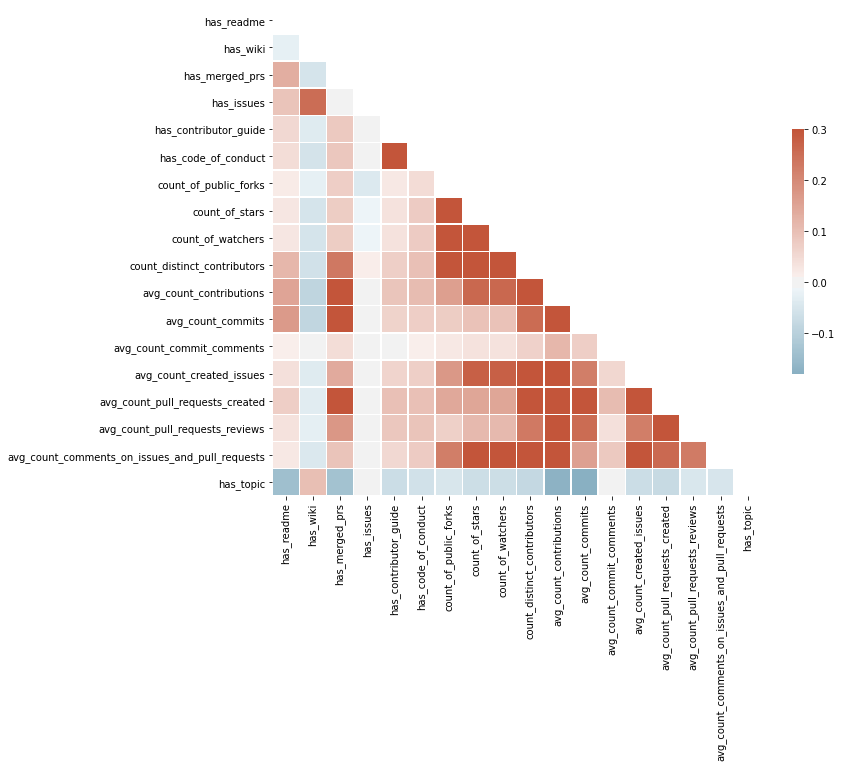

In [31]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df_join.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


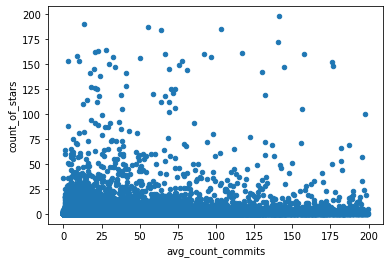

In [36]:
df_join[df_join.count_of_stars < 200 ].plot.scatter(x='avg_count_commits',y='count_of_stars')

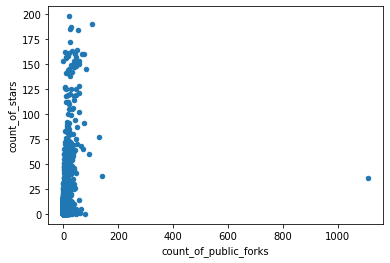

In [40]:
df_join[df_join.count_of_stars < 200 ].plot.scatter(x='count_of_public_forks',y='count_of_stars')

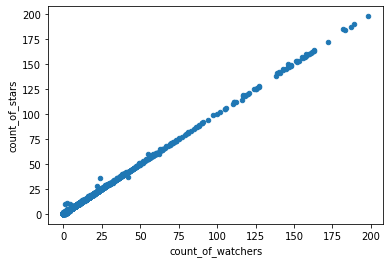

In [41]:
df_join[df_join.count_of_stars < 200 ].plot.scatter(x='count_of_watchers',y='count_of_stars')

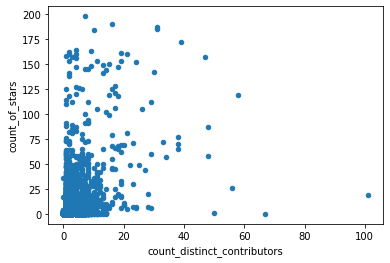

In [43]:
df_join[df_join.count_of_stars < 200 ].plot.scatter(x='count_distinct_contributors',y='count_of_stars')

## Regression on Stars

There is not a linear relationship between Stars and other variables except watchers. Since there is a lot of multicollinearity (correlation between many variables), it would be best to apply regularization techqniues such as Ridge. After doing this, it seems only one feature has an effect as we increase the penalty on lambda.

In [44]:
X = df_join.iloc[:,12:]
y = df_join.count_of_stars
X.drop(['count_of_stars'],axis=1,inplace=True)

X.columns

Index(['has_wiki', 'has_merged_prs', 'has_issues', 'has_contributor_guide',
       'has_code_of_conduct', 'count_of_public_forks', 'count_of_watchers',
       'count_distinct_contributors', 'avg_count_contributions',
       'avg_count_commits', 'avg_count_commit_comments',
       'avg_count_created_issues', 'avg_count_pull_requests_created',
       'avg_count_pull_requests_reviews',
       'avg_count_comments_on_issues_and_pull_requests', 'has_topic'],
      dtype='object')

In [ ]:
from sklearn import linear_model


# #############################################################################
# Compute paths

alphas = [0,.001,.10,.1,1,10]

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()



## 2 sided Z test



$ z = \frac{\overline{x} - \mu}{\frac{s}{\sqrt{n}}}$

$H_o$: *There is no relationship between documentation and stars*

$H_a$: *There is a relationship between documentation and stars*

Note: I am not including ReadMe's because most repos are initialized with a ReadMe but doesnt mean it has been modified. Also Stars and Public Forks are highly correlated so just going with Stars.

Having a contributor guide or a wiki the Z score was a -1.87 meaning we can't reject the null hypothesis and there is no relationship between documentation and stars.

However when I looked having both documentation types, the Z score was a 5.2 which is greather than 1.96 meaning we can reject our null hypothesis and accept there is a significant relationship between documentation and stars only if there is a contributor guide since the Z score of the contributor guide was higher than the Wiki's.



In [58]:
# Documentation in terms of contributor guide OR Wiki
df_join['has_documentation'] = np.where((df_join.has_contributor_guide == 1) | (df_join.has_wiki == 1),1,0)
df_join[(df_join.has_documentation == 1)]['count_of_stars'].describe()

count    115518.000000
mean          0.659231
std          10.735144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1690.000000
Name: count_of_stars, dtype: float64

In [59]:
#zscore
import math
(.65 - .709) / ((10.7/math.sqrt(115518)))

-1.8741013113999088

In [56]:
# Documentation in terms of having BOTH contributing guide AND Wiki
df_join['has_documentation'] = np.where((df_join.has_contributor_guide == 1) & (df_join.has_wiki == 1),1,0)
df_join[(df_join.has_documentation == 1)]['count_of_stars'].describe()

count    943.000000
mean       3.539767
std       16.700632
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      326.000000
Name: count_of_stars, dtype: float64

In [57]:
#z score
# our average stars for this entire data is .709

(3.53 - .709) / ((16/math.sqrt(943)))

5.414258036872989

In [60]:
# Documentation in terms of at least contributing guide
df_join['has_documentation'] = np.where((df_join.has_contributor_guide == 1),1,0)
df_join[(df_join.has_documentation == 1)]['count_of_stars'].describe()

count     995.000000
mean        5.335678
std        51.713807
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1544.000000
Name: count_of_stars, dtype: float64

In [61]:
# Documentation in terms of at least wiki
df_join['has_documentation'] = np.where((df_join.has_wiki == 1),1,0)
df_join[(df_join.has_documentation == 1)]['count_of_stars'].describe()

count    115466.000000
mean          0.642458
std           9.717375
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1690.000000
Name: count_of_stars, dtype: float64